<h1>Batik Nusantara image classification using Xception</h1>
<p>Author: HendryHB</p>

<h3>Xception</h3>
<p style="text-indent: 25px;">The Xception model, introduced by François Chollet (the creator of the Keras deep-learning library) in 2016, represents an advancement in deep learning for image classification tasks. Its name stands for <strong>"Extreme Inception,"</strong> signifying an evolution from the Inception architecture. Leveraging the depthwise separable convolutions, the Xception model has demonstrated superior performance in image recognition tasks. The availability of pretrained versions of this model allows researchers and practitioners to leverage its robust feature extraction capabilities without the need for extensive computational resources and time for training from scratch [1][2].<br></p>

<strong>Xception Conceptual</strong><br>
<p style="text-indent: 25px;">Xception builds on the concept of depthwise separable convolutions, which decompose the standard convolution operation into two simpler operations: a depthwise convolution and a pointwise convolution. This decomposition aims to reduce the computational complexity while retaining high model performance. The conceptual framework of Xception posits that mapping spatial correlations and channel correlations separately is more efficient and effective than handling them jointly, as done in traditional convolutions.</p>

<strong>Xception Components</strong><br>
<p>The key components of the Xception model include:
<ol>
    <li>Depthwise Separable Convolutions: This key component involves two layers:</li>
    <ul>
        <li>Depthwise Convolution: Applies a single convolutional filter per input channel.</li>
        <li>Pointwise Convolution: Uses a 1x1 convolution to combine the outputs of the depthwise convolutions.</li>
    </ul>
    <li>Residual Connections: Similar to the ResNet architecture, Xception incorporates residual connections, which help in mitigating the vanishing gradient problem and enable the training of deeper networks.</li>
    <li>Entry, Middle, and Exit Flow: The architecture is divided into three main sections:</li>
    <ul>
        <li>Entry Flow: Captures initial features from the input image.</li>
        <li>Middle Flow: Consists of multiple identical modules for feature extraction.</li>
        <li>Exit Flow: Final layers for making predictions based on extracted features.</li>
    </ul>
</ol>
</p>
<strong>Architecture</strong><br>
<img src="https://github.com/hendryhb/kecakbali/blob/main/xception/1.png?raw=true">
<p>
<strong>Bibliography</strong><br>
[1]	F. Chollet, “Xception: Deep Learning with Depthwise Separable Convolutions,” 2016, arXiv. doi: 10.48550/ARXIV.1610.02357.<br>
[2] F. Chollet, Deep learning with Python. Shelter Island, NY: Manning, 2018.
</p>

In [3]:
from google.colab import drive
import zipfile
import sys
import h5py
import numpy as np
import os
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import xception
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Activation, GlobalAveragePooling2D

from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import array_to_img

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score

%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

## Load Data

In [3]:
drive.mount('/content/drive')

In [4]:
with zipfile.ZipFile("/content/drive/MyDrive/cv_data/raw_batik_v2.1.zip") as zip_ref:
  zip_ref.extractall("./")

<h1>Constants</h1>
<p>Please note that the input images need to be 299x299 pixels, as required by the Xception model, instead of 244x244 pixels.</p>

In [4]:
IMAGE_WIDTH = 299
IMAGE_HEIGHT = 299
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

<h1>Pure Inference Using Pre-trained Xception</h1>
<p style="text-indent: 25px;"><strong>Inference</strong> is the process of making predictions or generating outputs based on new or unseen data by utilizing a pre-trained model as-is, without any additional training. In this case, Xception, which has been trained on large datasets like ImageNet, is used with its pre-trained weights.</p>

## Load the pre-trained Xception model and higher level layers

In [31]:
model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=True)

<h2>Create a data generator for the inference data.</h2>
<p style="text-indent: 25px;">Since the dataset is divided into <code>training and testing</code> sets, let's use the train dataset. Alternatively, feel free to combine both folders into one and rename it as desired.</p>

In [32]:
# Data generator for inference
inference_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Assuming images for inference are in a directory "train" within DATA_DIR
inference_generator = inference_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode=None,  # No labels for inference
    batch_size=BATCH_SIZE,
    shuffle=False  # Do not shuffle for inference
)

Found 640 images belonging to 20 classes.


# Predict on the inference data

In [33]:
predictions = model.predict(inference_generator, verbose=1)

20/20 [==============================] - 2399s 123s/step


<h2>Post-processing the Output</h2>
<p><code>decode_predictions</code> translates the model's raw output into human-readable class labels and probabilities</p>

In [34]:
decoded_predictions = decode_predictions(predictions, top=1)

# Print the predictions
for i, pred in enumerate(decoded_predictions):
    print(f"Image {i + 1}: {pred}")

Image 1: [('n02667093', 'abaya', 0.29073292)]
Image 2: [('n04136333', 'sarong', 0.66136914)]
Image 3: [('n03998194', 'prayer_rug', 0.83243716)]
Image 4: [('n03998194', 'prayer_rug', 0.34398842)]
Image 5: [('n03998194', 'prayer_rug', 0.64339864)]
Image 6: [('n03998194', 'prayer_rug', 0.75957745)]
Image 7: [('n02730930', 'apron', 0.30386594)]
Image 8: [('n04033995', 'quilt', 0.27815086)]
Image 9: [('n03998194', 'prayer_rug', 0.7281936)]
Image 10: [('n04136333', 'sarong', 0.30696815)]
Image 11: [('n03938244', 'pillow', 0.17191158)]
Image 12: [('n04136333', 'sarong', 0.51186675)]
Image 13: [('n03998194', 'prayer_rug', 0.10250713)]
Image 14: [('n03998194', 'prayer_rug', 0.7264037)]
Image 15: [('n02840245', 'binder', 0.66739446)]
Image 16: [('n03476684', 'hair_slide', 0.1821513)]
Image 17: [('n02840245', 'binder', 0.57354146)]
Image 18: [('n04136333', 'sarong', 0.29511437)]
Image 19: [('n03998194', 'prayer_rug', 0.18296583)]
Image 20: [('n03877472', 'pajama', 0.8471645)]
Image 21: [('n039981

<br><strong>Understanding the Output</strong><br>
<p style="text-indent: 25px;">The output from the <code>decode_predictions</code> function is based on the ImageNet dataset, which includes 1,000 different classes representing a wide variety of general image categories, such as everyday objects like cars, planes, bananas, basketballs, sarongs, and shower curtains. However, if using an inference pre-trained model with specific dataset like Batik Nusantara images and custom labels, <code>decode_predictions</code> will not work correctly because it relies on the ImageNet class indices and labels.</p>
<p style="text-indent: 25px;">To get meaningful predictions for specific classes like 'Bali_Barong' or 'Papua_Cendrawasih,' it is advisable to use a custom (pre-trained) model and layers trained on the Batik Nusantara dataset. This approach will enable the model to make predictions relevant to these specific classes.</p>

# Pretrained Xception Model and custom layers

## Load Data - If this is done, skip this step

In [3]:
drive.mount('/content/drive')

In [4]:
with zipfile.ZipFile("/content/drive/MyDrive/cv_data/raw_batik_v2.zip") as zip_ref:
  zip_ref.extractall("./")

<h2>Constants - If this is done, skip this step</h2>
<p>Please note that the input images need to be 299x299 pixels, as required by the Xception model, instead of 244x244 pixels.</p>

In [5]:
IMAGE_WIDTH = 299
IMAGE_HEIGHT = 299
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

## Data gathering using DataGenerator

In [7]:
common_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='constant',
    preprocessing_function=preprocess_input)

train_generator = common_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=os.path.join(DATA_DIR, "test"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb', # Set color mode to RGB
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.


<h2>Load Xception model without top layer and Compile</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [18]:
base_model = tf.keras.applications.xception.Xception(weights='imagenet',
                                                     include_top=False,
                                                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h2>Train the Model</h2>
<p>Please note that the training strategy used here is simple, and further customization is encouraged.</p>
<p><strong>Uncomment below to run training process</strong></p>

In [1]:
# EPOCHS = 25

# model_1.fit(train_generator,
#                       batch_size=BATCH_SIZE, verbose=1,
#                       epochs=EPOCHS, 
#                       validation_data=test_generator)

<h2>Load Weights Data</h2> 
<p style="text-indent: 25px;">To expedite the process, the Xception model has already been pre-trained, allowing to simply load the pre-trained weights instead of running the training again, which saves time. <strong>Skip this step and proceed to the evaluation and prediction after training the model</strong></p>

<h2>Load Xception Model without top layer and Compile - If this is done, skip this step</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [8]:
base_model = tf.keras.applications.xception.Xception(weights='imagenet',
                                                     include_top=False,
                                                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Load pre-trained weights¶

In [ ]:
model_1.load_weights('/content/drive/MyDrive/xception_batik_nusantara_weights.h5')

# Evaluation

In [10]:
test_loss, test_accuracy = model_1.evaluate(test_generator)
print(f"Test loss : {test_loss:0.3} and the test accuracy: {test_accuracy:0.2%}")

5/5 [==============================] - 437s 96s/step - loss: 0.1003 - accuracy: 1.0000
Test loss : 0.1 and the test accuracy: 100.00%


# Predict the classes

In [11]:
predictions = model_1.predict(test_generator)

5/5 [==============================] - 359s 75s/step


## Get class labels and Prediction class, labels and confidences

In [12]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get the true class indices
true_class_indices = test_generator.classes

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Map predicted class indices to the actual class labels
predicted_labels = [class_labels[idx] for idx in predicted_class_indices]

# Calculate the prediction confidence for each image
prediction_confidences = np.max(predictions, axis=1)

<h3>10 Lowest Predicted Images</h3> 
<p style="text-indent: 25px;">Displaying the lowest 10 predictions is more insightful than the highest predictions when using loaded pre-trained weights. However, if the model is trained from scratch, examining the highest predictions would also be valuable.</p>

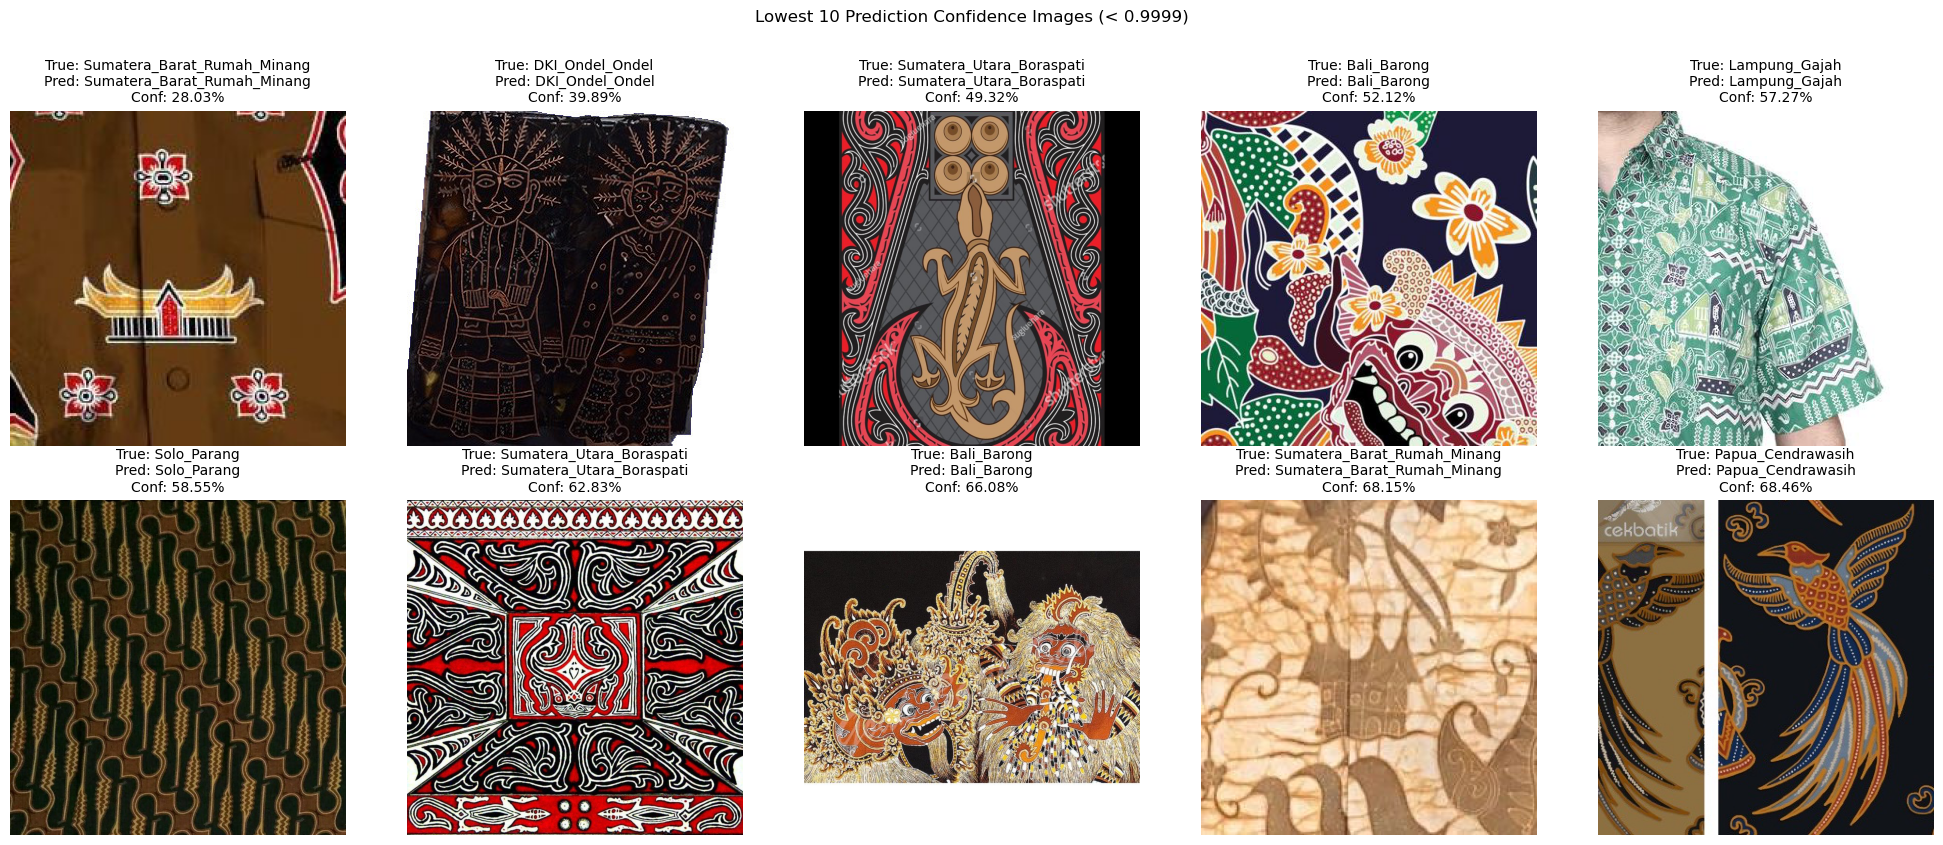

In [20]:
low_conf_indices = np.where(prediction_confidences < 0.9999)[0]
lowest_10_indices = np.argsort(prediction_confidences[low_conf_indices])[:10]

# Define the number of images to plot per row
images_per_row = 5

# Create a subplot grid to plot the images
fig, axes = plt.subplots(2, images_per_row, figsize=(20, 8)) 

for i, idx in enumerate(low_conf_indices[lowest_10_indices]):
    img_path = test_generator.filepaths[idx]
    true_label = class_labels[true_class_indices[idx]]
    predicted_label = predicted_labels[idx]
    confidence = prediction_confidences[idx] * 100
    
    img = plt.imread(img_path)
    ax = axes[i // images_per_row, i % images_per_row]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}%", fontsize=10)

plt.tight_layout()
plt.suptitle('Lowest 10 Prediction Confidence Images (< 0.9999)', y=1.05)
plt.show()

# Confusion Matrix and Classification Report

<h3>Calculate <code>y_true</code> and <code>y_pred</code></h3>
<p><code>y_true</code>, retrieves the true class labels of the test images, while <code>y_pred</code> determines the predicted class labels by selecting the class with the highest probability for each image.</p>

In [24]:
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

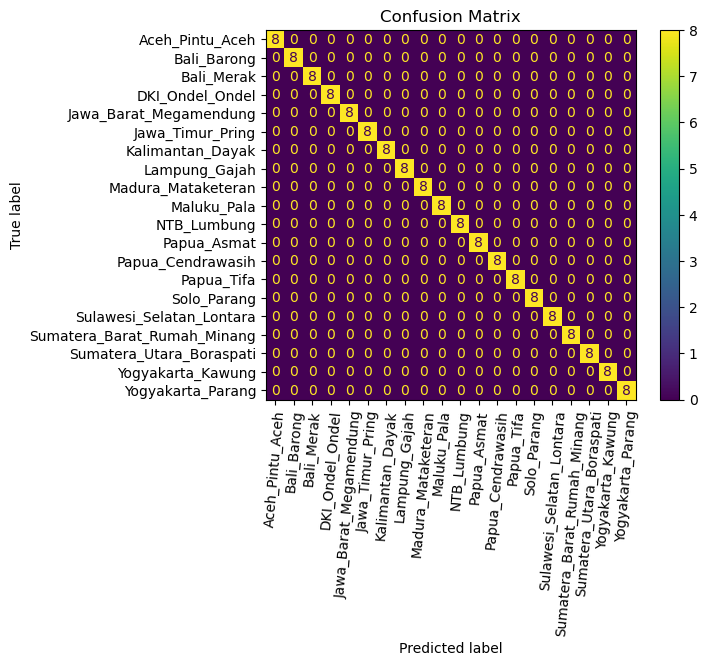

In [28]:
# Confusion Matrix Display
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.xticks(rotation=85)
plt.show()

In [29]:
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print('Classification Report')
print(class_report)

Classification Report
                             precision    recall  f1-score   support

            Aceh_Pintu_Aceh       1.00      1.00      1.00         8
                Bali_Barong       1.00      1.00      1.00         8
                 Bali_Merak       1.00      1.00      1.00         8
            DKI_Ondel_Ondel       1.00      1.00      1.00         8
     Jawa_Barat_Megamendung       1.00      1.00      1.00         8
           Jawa_Timur_Pring       1.00      1.00      1.00         8
           Kalimantan_Dayak       1.00      1.00      1.00         8
              Lampung_Gajah       1.00      1.00      1.00         8
         Madura_Mataketeran       1.00      1.00      1.00         8
                Maluku_Pala       1.00      1.00      1.00         8
                NTB_Lumbung       1.00      1.00      1.00         8
                Papua_Asmat       1.00      1.00      1.00         8
          Papua_Cendrawasih       1.00      1.00      1.00         8
           

<h1>Summary and Conclusion</h1>
<p style="text-indent: 25px;">
   The evaluation was conducted using weights from a previously trained model (which implies the model has already been fine-tuned during its prior training sessions), which were loaded and used for this evaluation. This means the high performance is a result of the knowledge the model gained during its prior training. Although the model's overall accuracy is perfect, the variation in confidence levels (some below 60% as seen on the 10 lowest images) suggests that the model might be overconfident in certain predictions or that it predicts some classes with less certainty.</p>
<p style="text-indent: 25px;">
    The high performance on the test set, coupled with the varied confidence levels, may indicate overfitting. The model might perform exceedingly well on the specific test data but may not generalize as well to other datasets.</p>
<p style="text-indent: 25px;">
    The Xception-based model shows excellent performance on the current test set, but the varied prediction confidences and the use of pre-trained weights suggest that additional evaluation and potential fine-tuning might be necessary to confirm its robustness and generalizability.</p>
<strong>Potential Adjustments</strong>
<p style="text-indent: 25px;">
Given the perfect scores, further evaluation using cross-validation or a more diverse and challenging test set is recommended to ensure the model's robustness and to confirm it generalizes well to new, unseen data, consider the following adjustments:</p>
<ol>
    <li>Increase Data Augmentation: Use more proper dataset augmentation to help the model generalize better and to avoid overfitting.</li>
    <li>Model Tuning: Experiment with different model architectures, hyperparameters, and training strategies.</li>
</ol>
<p style="text-indent: 25px;">
    The Xception model, with its innovative use of depthwise separable convolutions, presents a powerful tool for image classification and other computer vision tasks. Its design enables efficient computation without compromising on performance. The availability of pretrained versions of Xception facilitates its application across various domains, making it a valuable asset for both academic research and practical implementations. However, careful consideration is needed to mitigate potential disadvantages, such as overfitting and implementation complexity.</p>

#### -------End of Code------------

<h4><em>Should you find this kernel helpful, an upvote (&#x25B2;) would be greatly appreciated.</em></h3>